In [1]:
import io
import panel as pn
import pandas as pd
import cequalw2 as w2

pn.extension()

file_input = pn.widgets.FileInput(accept='.csv, .xls')
df_widget = pn.widgets.DataFrame()

def load_csv(data):
    if data is not None:
        bytes = io.BytesIO(data)
        df = df_widget.value
        df = pd.read_csv(bytes)
        df.index = df['JDAY']
        df = w2.dataframe_to_date_format(2006, df)
        df = df.drop('JDAY', axis=1)
        df_widget.value = df
        return df

f = pn.bind(load_csv, file_input.param.value)
pn.Column(file_input, f).servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'b54450bd-ae8e-4551-b8a5-4b2adac2bb03': {'version…

<Axes: xlabel='Date'>

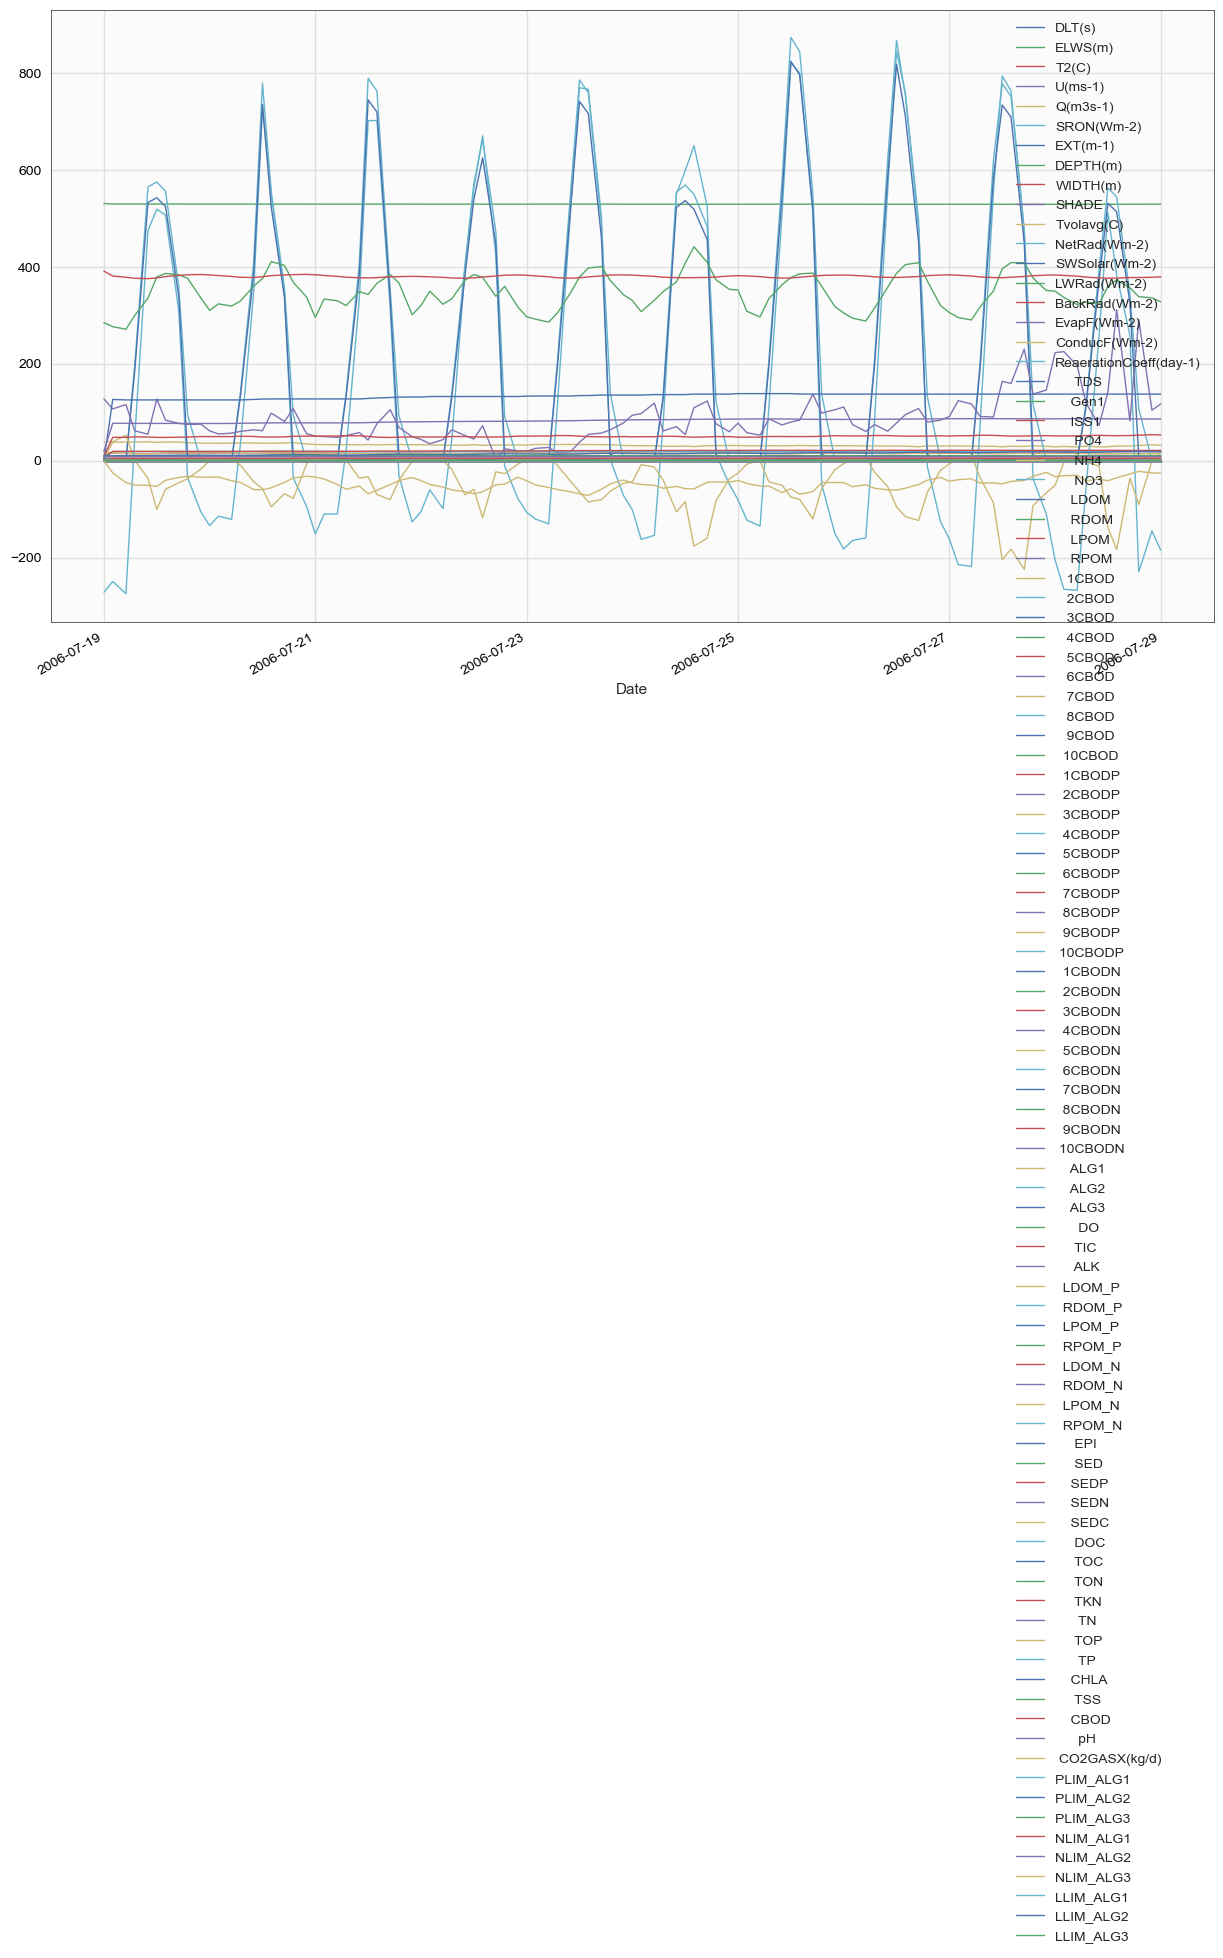

In [10]:
df_widget.value.plot()

In [ ]:
df.plot()